In [86]:
import spacy
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load the English model
nlp = spacy.load("en_core_web_sm")



In [87]:
#Load jsonl file and preprocess the data
# Read JSONL file and process each line
with open('climate_data_set/climate-fever.jsonl', 'r') as f:
    for line_number, line in enumerate(f, start=1):
        if line_number > 10:  # Stop after reading 10 lines
            break
        data = json.loads(line.strip())
        
        # Extract pass_summary field for text analysis
        claims_summary = data.get('claim', 'Key not found')

        # Initialize Spacy Doc
        doc = nlp(claims_summary)
        
        # Extract tokens, lemmas, and stop words
        tokens = [token.text for token in doc]
        lemmas = [token.lemma_ for token in doc]
        stop_words_removed = [token.text for token in doc if not token.is_stop]
        stemmed_words = [stemmer.stem(token.text) for token in doc]

        # Display the data
        print(f"===== Line {line_number} =====")
        print(f"Claim Summary: {claims_summary}")
        print(f"Tokens: {' | '.join(tokens)}")
        print(f"Lemmas: {' | '.join(lemmas)}")
        print(f"Stop Words Removed: {' | '.join(stop_words_removed)}")
        print(f"Stemmed Words: {' | '.join(stemmed_words)}")
        print("===== End of Line =====\n")

===== Line 1 =====
Claim Summary: Global warming is driving polar bears toward extinction
Tokens: Global | warming | is | driving | polar | bears | toward | extinction
Lemmas: global | warming | be | drive | polar | bear | toward | extinction
Stop Words Removed: Global | warming | driving | polar | bears | extinction
Stemmed Words: global | warm | is | drive | polar | bear | toward | extinct
===== End of Line =====

===== Line 2 =====
Claim Summary: The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists
Tokens: The | sun | has | gone | into | ‘ | lockdown | ’ | which | could | cause | freezing | weather | , | earthquakes | and | famine | , | say | scientists
Lemmas: the | sun | have | go | into | ' | lockdown | ' | which | could | cause | freeze | weather | , | earthquake | and | famine | , | say | scientist
Stop Words Removed: sun | gone | ‘ | lockdown | ’ | cause | freezing | weather | , | earthquakes | famine | , | scientists
Stem

===== Line 1 =====
Claim Summary: Global warming is driving polar bears toward extinction
Named Entities: []
===== End of Line =====

===== Line 2 =====
Claim Summary: The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists
Named Entities: []
===== End of Line =====

===== Line 3 =====
Claim Summary: The polar bear population has been growing.
Named Entities: []
===== End of Line =====

===== Line 4 =====
Claim Summary: Ironic' study finds more CO2 has slightly cooled the planet
Named Entities: []
===== End of Line =====

===== Line 5 =====
Claim Summary: Human additions of CO2 are in the margin of error of current measurements and the gradual increase in CO2 is mainly from oceans degassing as the planet slowly emerges from the last ice age.
Named Entities: []
===== End of Line =====

===== Line 6 =====
Claim Summary: They tell us that we are the primary forces controlling earth temperatures by the burning of fossil fuels and releasin

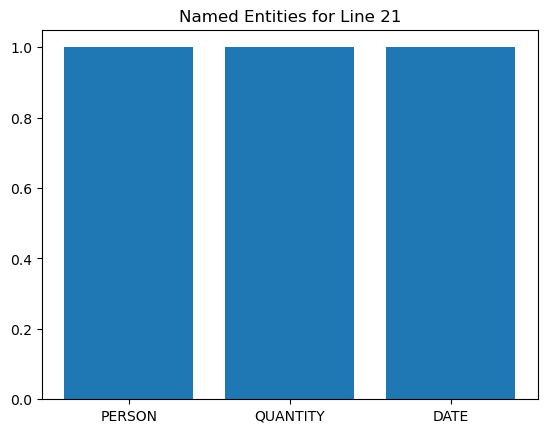

In [88]:
#Apply NER with spacy
# Read JSONL file and process each line
with open('climate_data_set/climate-fever.jsonl', 'r') as f:
    for line_number, line in enumerate(f, start=1):
        if line_number > 20:  # Stop after reading 20 lines
            break

        data = json.loads(line.strip())
        
        # Extract claim_summary field for text analysis
        claims_summary = data.get('claim', 'Key not found')

        # Initialize Spacy Doc
        doc = nlp(claims_summary)
        
        # Extract named entities
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]

        # Display the data
        print(f"===== Line {line_number} =====")
        print(f"Claim Summary: {claims_summary}")
        print(f"Named Entities: {named_entities}")
        print("===== End of Line =====\n")
        
# Plot the named entities
entities = [ent.label_ for ent in doc.ents]
entity_counts = Counter(entities)
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title(f"Named Entities for Line {line_number}")
plt.show()



===== Line 1 =====
Claim Summary: Global warming is driving polar bears toward extinction
POS Tags: [('Global', 'ADJ'), ('warming', 'NOUN'), ('is', 'AUX'), ('driving', 'VERB'), ('polar', 'ADJ'), ('bears', 'NOUN'), ('toward', 'ADP'), ('extinction', 'NOUN')]
===== End of Line =====

===== Line 2 =====
Claim Summary: The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists
POS Tags: [('The', 'DET'), ('sun', 'NOUN'), ('has', 'AUX'), ('gone', 'VERB'), ('into', 'ADP'), ('‘', 'PUNCT'), ('lockdown', 'NOUN'), ('’', 'PUNCT'), ('which', 'PRON'), ('could', 'AUX'), ('cause', 'VERB'), ('freezing', 'VERB'), ('weather', 'NOUN'), (',', 'PUNCT'), ('earthquakes', 'NOUN'), ('and', 'CCONJ'), ('famine', 'NOUN'), (',', 'PUNCT'), ('say', 'VERB'), ('scientists', 'NOUN')]
===== End of Line =====

===== Line 3 =====
Claim Summary: The polar bear population has been growing.
POS Tags: [('The', 'DET'), ('polar', 'ADJ'), ('bear', 'NOUN'), ('population', 'NOUN'), ('

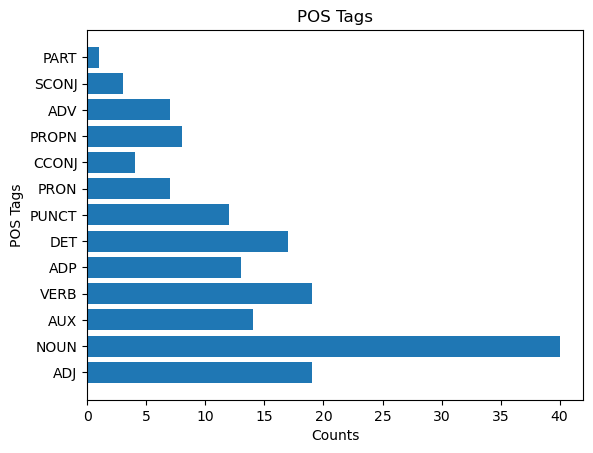

In [89]:

# Initialize an empty Counter object for POS tags
pos_counter = Counter()

# Read JSONL file and process each line
with open('climate_data_set/climate-fever.jsonl', 'r') as f:
    for line_number, line in enumerate(f, start=1):
        if line_number > 10:  # Stop after reading 10 lines
            break
        data = json.loads(line.strip())
        
        # Extract claim_summary field for text analysis
        claims_summary = data.get('claim', 'Key not found')

        # Initialize Spacy Doc
        doc = nlp(claims_summary)
        
        # Extract named entities
        pos_tags = [(token.text, token.pos_) for token in doc]

        # Update the counter object with POS tags
        for _, pos in pos_tags:
            pos_counter[pos] += 1

        # Display the data
        print(f"===== Line {line_number} =====")
        print(f"Claim Summary: {claims_summary}")
        print(f"POS Tags: {pos_tags}")
        print("===== End of Line =====\n")

# Plot the POS tags as a horizontal bar chart
plt.barh(list(pos_counter.keys()), list(pos_counter.values()))

plt.title('POS Tags')
plt.xlabel('Counts')
plt.ylabel('POS Tags')

plt.show()




In [90]:
#Use AWS Comprehend to extract entities and suplementary 
import boto3
import json
from dotenv import load_dotenv
import os

load_dotenv()

aws_access_key_id = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key = os.getenv("AWS_SECRET_ACCESS_KEY")
aws_region = os.getenv("AWS_REGION")


In [91]:
# Initialize a session using Amazon Comprehend
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=aws_region
)

comprehend = session.client('comprehend')

# Read JSONL file and process each line
with open('climate_data_set/climate-fever.jsonl', 'r') as f:
    for line_number, line in enumerate(f, start=1):
        if line_number > 10:  # Stop after reading 10 lines
            break

        data = json.loads(line.strip())
        
        # Extract claim_summary field for text analysis
        claims_summary = data.get('claim', 'Key not found')

        # Use Amazon Comprehend for Named Entity Recognition
        response = comprehend.detect_entities(
            Text=claims_summary,
            LanguageCode='en'
        )

        # Display the data
        print(f"===== Line {line_number} =====")
        print(f"Claim Summary: {claims_summary}")
        print(f"Named Entities: {response['Entities']}")
        print("===== End of Line =====\n")

# Use Amazon Comprehend for Sentiment Analysis
response = comprehend.detect_sentiment(
    Text=claims_summary,
    LanguageCode='en'
)
# Display the data
print(f"===== Line {line_number} =====")
print(f"Claim Summary: {claims_summary}")
print(f"Sentiment: {response['Sentiment']}")
print(f"Sentiment Score: {response['SentimentScore']}")
print("===== End of Line =====\n")

# Use Amazon Comprehend for Key Phrase Extraction
response = comprehend.detect_key_phrases(
    Text=claims_summary,
    LanguageCode='en'
)
# Display the data
print(f"===== Line {line_number} =====")
print(f"Claim Summary: {claims_summary}")
print(f"Key Phrases: {response['KeyPhrases']}")
print("===== End of Line =====\n")




===== Line 1 =====
Claim Summary: Global warming is driving polar bears toward extinction
Named Entities: []
===== End of Line =====

===== Line 2 =====
Claim Summary: The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists
Named Entities: []
===== End of Line =====

===== Line 3 =====
Claim Summary: The polar bear population has been growing.
Named Entities: []
===== End of Line =====

===== Line 4 =====
Claim Summary: Ironic' study finds more CO2 has slightly cooled the planet
Named Entities: [{'Score': 0.9601055383682251, 'Type': 'OTHER', 'Text': 'CO2', 'BeginOffset': 25, 'EndOffset': 28}]
===== End of Line =====

===== Line 5 =====
Claim Summary: Human additions of CO2 are in the margin of error of current measurements and the gradual increase in CO2 is mainly from oceans degassing as the planet slowly emerges from the last ice age.
Named Entities: [{'Score': 0.9842271208763123, 'Type': 'OTHER', 'Text': 'CO2', 'BeginOffset': 19, '